## 머신러닝 실습

### 와인품질 등급 회귀분석

#### 데이터 

#### UC어바인 머신러닝 연구소 모듈 사용

In [180]:
## 필수 라이브러리 사용등록
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo

In [181]:
## 와인 데이터 가져오기, 와인품질 id=186
wineQuality = fetch_ucirepo(id=186)

In [182]:
dfWineQuality= wineQuality.data.original

In [183]:
dfWineQuality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [184]:
dfWineQuality.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


##### 머신러닝 준비
- X, y 값 생성

In [185]:
X = dfWineQuality.drop(['quality','color'], axis=1)

In [186]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB


In [187]:
y = dfWineQuality['quality']

In [188]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6497 entries, 0 to 6496
Series name: quality
Non-Null Count  Dtype
--------------  -----
6497 non-null   int64
dtypes: int64(1)
memory usage: 50.9 KB


##### 분석모델 구축, 결과 분석

In [189]:
## 회귀분석용 모델, 함수 사용등록
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import sklearn

In [190]:
# 훈련용 데이터와 검증(평가)용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [191]:
# tail()로 보면 값이 다 안보여서 안됨, info()로 보면 값이 뭐가 들어가있는지 모르기때문에 안됨
X_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
3761,9.9,0.490,0.23,2.40,0.087,19.0,115.0,0.99480,2.77,0.44,9.400000
3740,7.7,0.280,0.35,15.30,0.056,31.0,117.0,0.99980,3.27,0.50,9.600000
1359,11.6,0.475,0.40,1.40,0.091,6.0,28.0,0.99704,3.07,0.65,10.033333
1230,7.7,0.180,0.34,2.70,0.066,15.0,58.0,0.99470,3.37,0.78,11.800000
4751,7.6,0.250,1.23,4.60,0.035,51.0,294.0,0.99018,3.03,0.43,13.100000
...,...,...,...,...,...,...,...,...,...,...,...
3772,7.6,0.320,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.200000
5191,5.6,0.280,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.700000
5226,6.4,0.370,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.500000
5390,6.5,0.260,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.500000


In [192]:
X_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
3103,7.0,0.17,0.74,12.80,0.045,24.0,126.0,0.99420,3.26,0.38,12.2
1419,7.7,0.64,0.21,2.20,0.077,32.0,133.0,0.99560,3.27,0.45,9.9
4761,6.8,0.39,0.34,7.40,0.020,38.0,133.0,0.99212,3.18,0.44,12.0
4690,6.3,0.28,0.47,11.20,0.040,61.0,183.0,0.99592,3.12,0.51,9.5
4032,7.4,0.35,0.20,13.90,0.054,63.0,229.0,0.99888,3.11,0.50,8.9
...,...,...,...,...,...,...,...,...,...,...,...
4294,5.7,0.23,0.28,9.65,0.025,26.0,121.0,0.99250,3.28,0.38,11.3
3757,7.4,0.18,0.27,1.30,0.048,26.0,105.0,0.99400,3.52,0.66,10.6
5954,6.4,0.31,0.28,2.50,0.039,34.0,137.0,0.98946,3.22,0.38,12.7
4418,6.0,0.21,0.34,2.00,0.042,63.0,123.0,0.99052,3.44,0.42,11.4


In [193]:
y_train

3761    6
3740    5
1359    6
1230    6
4751    6
       ..
3772    5
5191    7
5226    5
5390    5
860     5
Name: quality, Length: 4547, dtype: int64

In [194]:
y_test

3103    8
1419    5
4761    7
4690    6
4032    6
       ..
4294    6
3757    6
5954    6
4418    6
6182    6
Name: quality, Length: 1950, dtype: int64

In [195]:
## 선형회귀 모델 생성
model = LinearRegression()

In [196]:
# 선형회귀 모델 훈련
model.fit(X_train, y_train) # X는 독립변수12, y 는 종속변수 (품질)

LinearRegression()

In [197]:
# 선형회귀 분석, 예측
# X_test를 매게변수로 실행했을때 문제가 발생하면 np.array(X_test)를 사용
y_predict = model.predict(X_test)

In [198]:
y_test

3103    8
1419    5
4761    7
4690    6
4032    6
       ..
4294    6
3757    6
5954    6
4418    6
6182    6
Name: quality, Length: 1950, dtype: int64

In [199]:
y_predict

array([6.65205969, 5.00475598, 6.29378238, ..., 6.42669841, 6.45276417,
       5.59884935])

In [200]:
## 분석평거지표별 수치 
## MSE, RMSE가 0에 가까우면 예측값과 실제값간의 차이가 거의 없음
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print(f'MSE = {mse:.4f}')
print(f'RMSE = {rmse:.4f}')
print(f'R^2(VS) = {r2:.4f}')

MSE = 0.5326
RMSE = 0.7298
R^2(VS) = 0.2701


In [201]:
## Y절편값, 회귀계수 값
print(f'Y절편값 = {model.intercept_:.4f}')
print(f'독립변수별 회귀계수값 = {np.round(model.coef_, 1)}')

Y절편값 = 61.9670
독립변수별 회귀계수값 = [  0.1  -1.4  -0.2   0.   -0.1   0.   -0.  -61.5   0.5   0.8   0.3]


In [202]:
pd.Series(data=np.round(model.coef_, 2), index=X.columns)

fixed_acidity            0.08
volatile_acidity        -1.38
citric_acid             -0.15
residual_sugar           0.05
chlorides               -0.06
free_sulfur_dioxide      0.01
total_sulfur_dioxide    -0.00
density                -61.46
pH                       0.46
sulphates                0.81
alcohol                  0.27
dtype: float64

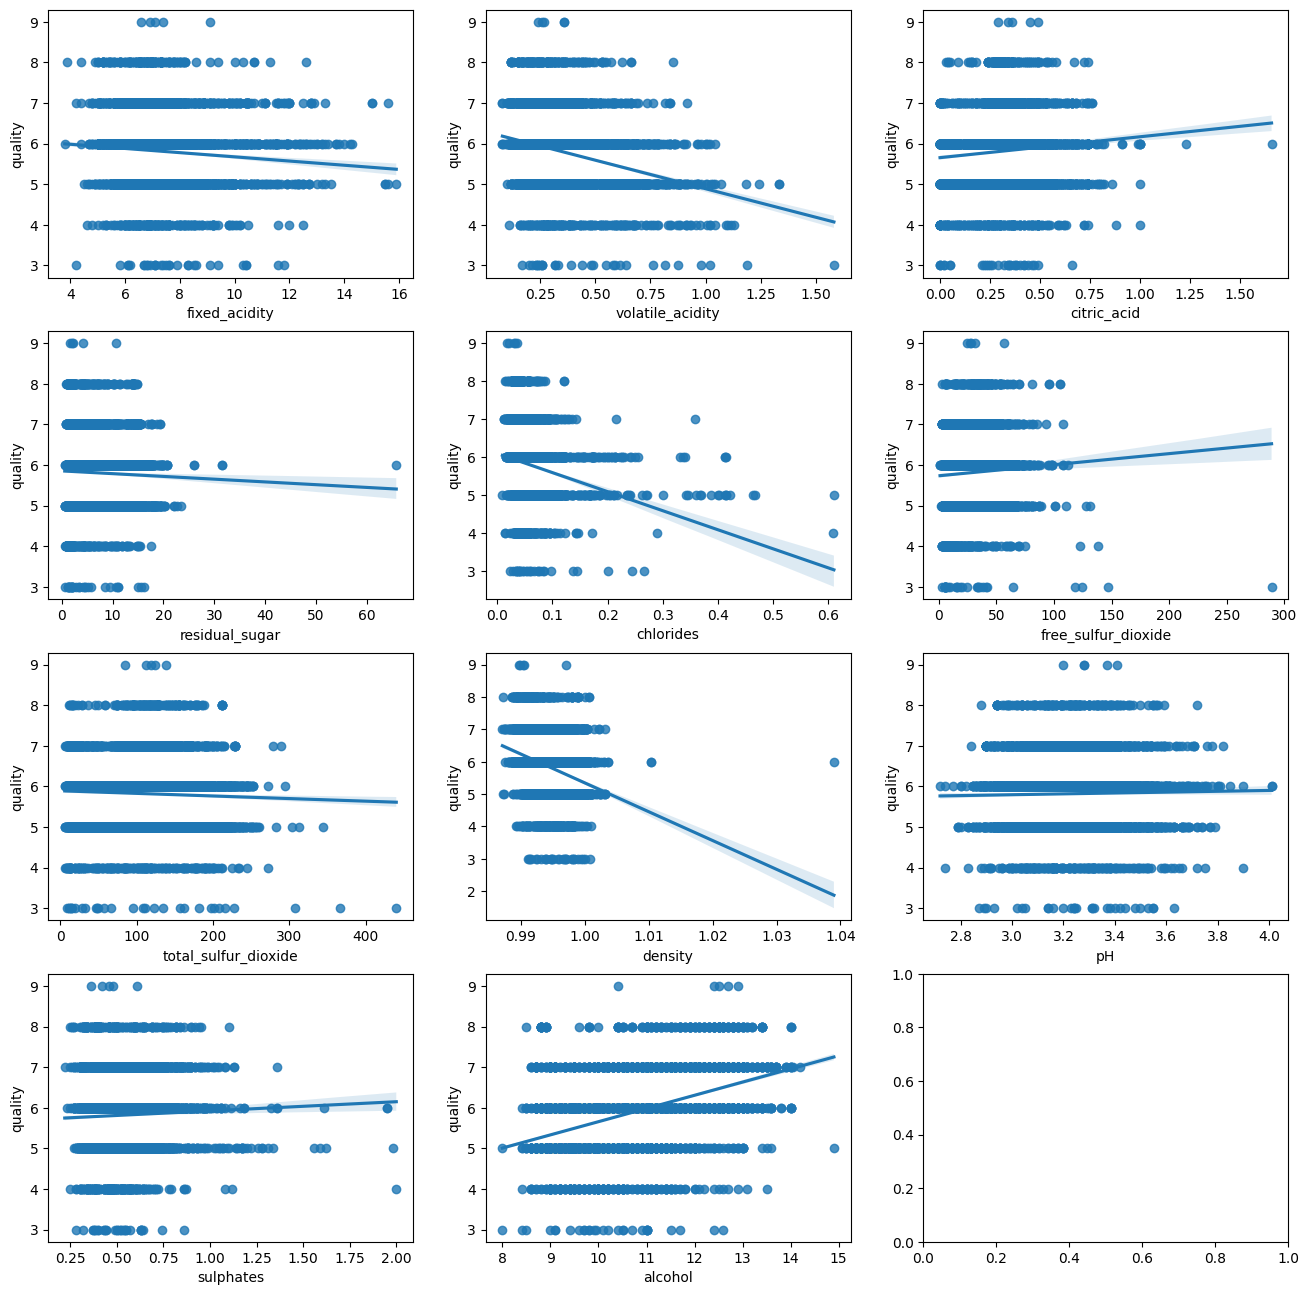

In [203]:
## 산점도
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=4)

x_features = list(X.columns)

for i, feat in enumerate(x_features):
    row = i // 3
    col = i % 3
    sns.regplot(data=dfWineQuality, x=feat, y='quality',ax=axs[row][col])

plt.show()

In [204]:
## 9등급 와인 추출
dfTemp = dfWineQuality[dfWineQuality['quality'] == 9]

In [205]:
## 9등급 와인 최종 테스트 값
dfWineTop = dfTemp.drop(['quality','color'], axis = 1)

In [206]:
predicts = model.predict(dfWineTop)

In [207]:
predicts

array([6.02739241, 6.57724823, 6.50046455, 6.67089157, 6.65271444])

## 결론
- 머신러닝으로 학습을 해도 9등급 와인에 대해서 예측을 못함